# CIFAR 100 - Keras

In [1]:
# Import all modules
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
#from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

# Import Tensorflow with multiprocessing
import tensorflow as tf
import multiprocessing as mp
 
# Loading the CIFAR-100 datasets
from keras.datasets import cifar100

Using TensorFlow backend.


In [2]:
#Load the Dataset 
(x_train, y_train), (x_test,y_test) = cifar100.load_data()

class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

169009152/169001437 [==============================] - 10s 0us/step


In [3]:
#Declaring Variables
batch_size = 32 #Smaller Batch size means more updates in one epoch

num_classes = 100 
epochs = 100 #Repeat 100 times

# Looking at the dataset

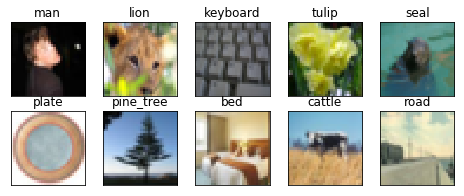

In [4]:
# Print 10 random images for 10 random classes 
fig = plt.figure(figsize=(8,3))
for i in range(10):
    num = np.random.randint(100)
    ax = fig.add_subplot(2,5,1 + i, xticks=[],yticks=[])
    idx = np.where(y_train[:]== num)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    ax.set_title(class_names[num])
    plt.imshow(im)
plt.show()

We now need to normalize the pixel values. This means to turn them from in the range of 0-255 to be between 0 and 1. 

In [5]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

# Making a model

In [6]:
#Architecture from: https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/
import keras
from keras import regularizers
from keras.layers import LeakyReLU

def model():
    weight_decay = 1e-4
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))
    
    opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
    return model
cnn = model() 
cnn.summary()
 
# Fit model
cnn4 = cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
__________

Epoch 25/100
50000/50000 [==============================] - 62s 1ms/step - loss: 2.1342 - acc: 0.6377 - val_loss: 2.5463 - val_acc: 0.5630
Epoch 26/100
50000/50000 [==============================] - 61s 1ms/step - loss: 2.1327 - acc: 0.6399 - val_loss: 2.5383 - val_acc: 0.5586
Epoch 27/100
50000/50000 [==============================] - 61s 1ms/step - loss: 2.1158 - acc: 0.6453 - val_loss: 2.5385 - val_acc: 0.5650
Epoch 28/100
50000/50000 [==============================] - 61s 1ms/step - loss: 2.1006 - acc: 0.6500 - val_loss: 2.5209 - val_acc: 0.5675
Epoch 29/100
50000/50000 [==============================] - 61s 1ms/step - loss: 2.0998 - acc: 0.6523 - val_loss: 2.5400 - val_acc: 0.5602
Epoch 30/100
50000/50000 [==============================] - 61s 1ms/step - loss: 2.0836 - acc: 0.6579 - val_loss: 2.5384 - val_acc: 0.5674
Epoch 31/100
50000/50000 [==============================] - 61s 1ms/step - loss: 2.0815 - acc: 0.6599 - val_loss: 2.4931 - val_acc: 0.5785
Epoch 32/100
50000/50000 [=

Epoch 84/100
50000/50000 [==============================] - 62s 1ms/step - loss: 1.8039 - acc: 0.7512 - val_loss: 2.6243 - val_acc: 0.5965
Epoch 85/100
50000/50000 [==============================] - 62s 1ms/step - loss: 1.8076 - acc: 0.7529 - val_loss: 2.5810 - val_acc: 0.6066
Epoch 86/100
50000/50000 [==============================] - 62s 1ms/step - loss: 1.8040 - acc: 0.7506 - val_loss: 2.6027 - val_acc: 0.5978
Epoch 87/100
50000/50000 [==============================] - 62s 1ms/step - loss: 1.7937 - acc: 0.7560 - val_loss: 2.5693 - val_acc: 0.6049
Epoch 88/100
50000/50000 [==============================] - 62s 1ms/step - loss: 1.7955 - acc: 0.7543 - val_loss: 2.6006 - val_acc: 0.6006
Epoch 89/100
50000/50000 [==============================] - 62s 1ms/step - loss: 1.7924 - acc: 0.7568 - val_loss: 2.6143 - val_acc: 0.5990
Epoch 90/100
50000/50000 [==============================] - 62s 1ms/step - loss: 1.7975 - acc: 0.7558 - val_loss: 2.6014 - val_acc: 0.6018
Epoch 91/100
50000/50000 [=

# Plotting our accuracy and loss
Looking at the last epoch, we have 72% accuracy in the training set but 57% in our validation, so it looks like the model is overfitting. 

In [7]:
scores = cnn.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 60.57%


[]

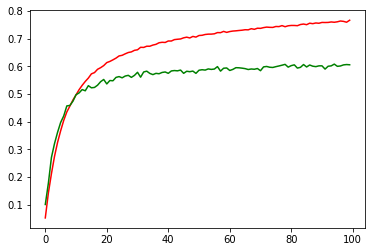

In [8]:
plt.figure(0)
plt.plot(cnn4.history['acc'],'r')
plt.plot(cnn4.history['val_acc'],'g')
plt.plot()

# Confusion Matrix for our model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = cnn.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd

df_cm = pd.DataFrame(cm, range(100),range(100))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

# Saving our model to disk

In [ ]:
#save to disk
model_json = cnn.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
cnn.save_weights('model.h5') 

# Using our model for prediction. 

In [ ]:
from matplotlib import pyplot
from scipy.misc import toimage
from keras.models import model_from_json

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
# mean-std normalization
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

def show_imgs(X):
    pyplot.figure(1)
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            pyplot.subplot2grid((4,4),(i,j))
            pyplot.imshow(toimage(X[k]))
            k = k+1
    # show the plot
    pyplot.show()
    
show_imgs(x_test[:16])
 
# Load trained CNN model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('model.h5')
 
labels = class_names
 
indices = np.argmax(model.predict(x_test[:16]),1)
print([labels[x] for x in indices])

You can see it gets some of them correct, like the lamp and rocket, but it predicts the lion to be a bee and other mistakes. 